**Prática de Realce e detecção de borda**

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm



In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Aplique os filtros de realce Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

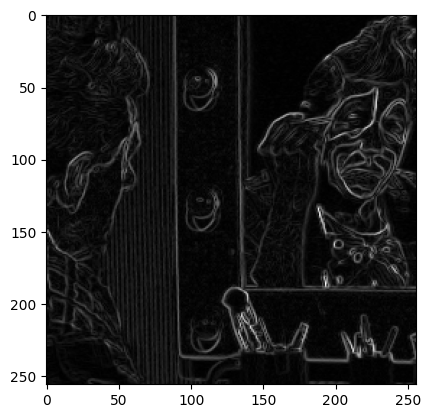

In [2]:
#ROBERTS
import cv2
import matplotlib.pyplot as plt
import numpy as np
# code here
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)

#gerando as mascaras
maskX = np.array([[1, 0],
                 [0,-1]])
maskY = np.array([[0, 1],
                 [-1, 0]])

gradX = cv2.filter2D(img1, cv2.CV_64F, maskX)
gradY = cv2.filter2D(img1, cv2.CV_64F, maskY)

mag = np.sqrt(gradX**2 + gradY**2)

#mag = np.uint8(mag)
plt.imshow(mag, cmap='gray', vmin=0, vmax=255);

(-0.5, 255.5, 255.5, -0.5)

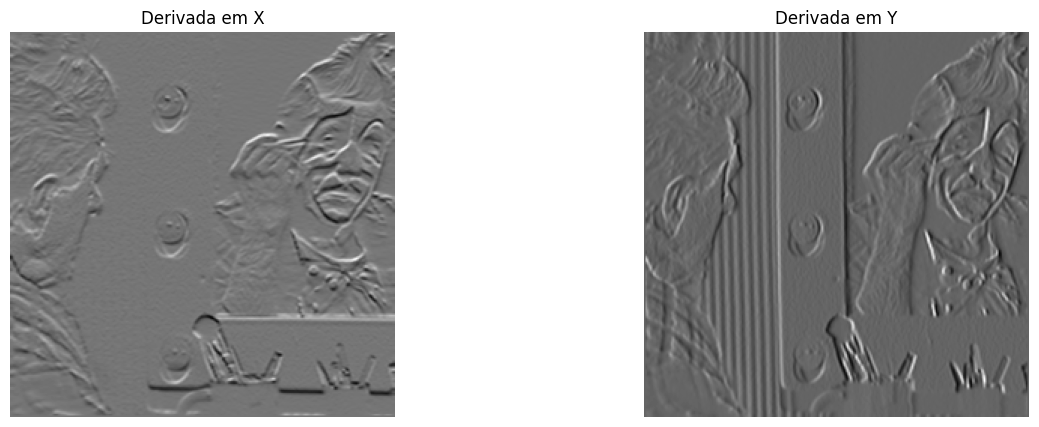

In [3]:
#SOBEL
import cv2
import matplotlib.pyplot as plt
import numpy as np
# code here
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)

#gerando as mascaras
maskX = np.array([[-1, -2, -1],
                 [0, 0, 0],
                 [1, 2, 1]])
maskY = np.array([[-1, 0, 1], 
                  [-2, 0, 2],
                  [-1, 0, 1]])

gradX = cv2.filter2D(img1, cv2.CV_64F, maskX)
gradY = cv2.filter2D(img1, cv2.CV_64F, maskY)

mag = np.sqrt(gradX**2 + gradY**2)

mag = np.uint8(mag)

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1).set_title("Derivada em X")
plt.imshow(gradX, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2).set_title("Derivada em Y")
plt.imshow(gradY, cmap='gray')
plt.axis('off')

2) Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

(-0.5, 255.5, 255.5, -0.5)

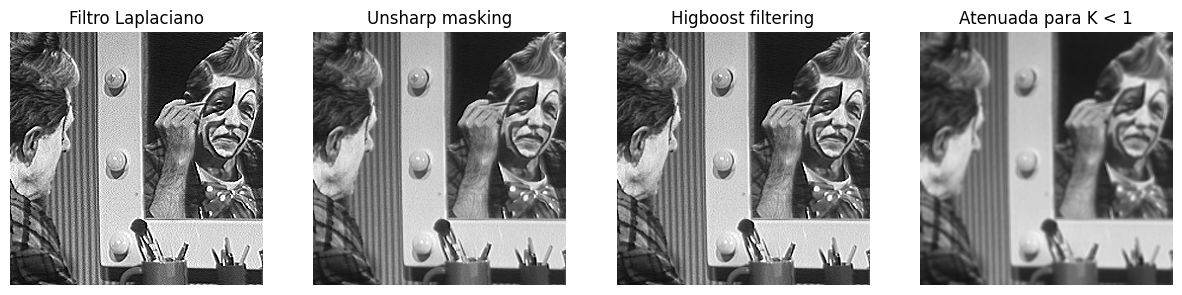

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# code here
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)

#LAPLACIANO
LapMask = np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])
Lap = cv2.filter2D(img1, cv2.CV_64F, LapMask)
LapFiltered = img1 - Lap
#LapFiltered = np.uint8(LapFiltered)

#UNSHARP MASKING
#gerando suavização através do filtro de mediana:

def gaussiana(i, j, sigma):
    return (1.0 / (2 * np.pi * (sigma ** 2))) * np.exp(-((i ** 2 + j ** 2) / (2 * sigma ** 2)))

def gerarMascara(tam, sigma):
    mask = np.zeros((tam, tam))
    center = tam // 2
    for i in range(tam):
        for j in range(tam):
            mask[i, j] = gaussiana(i - center, j - center, sigma)
    return mask / np.sum(mask)

suav = cv2.filter2D(img1, cv2.CV_64F, gerarMascara(3, 1))
Gmask = img1 - suav
UnsharpFilter = img1 + Gmask

#HIGHBOOST FILTERING

highboost = img1 + (2 *  Gmask)
atenuada = img1 - (1.5 * Gmask)


fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1).set_title("Filtro Laplaciano")
plt.imshow(LapFiltered, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 4, 2).set_title("Unsharp masking")
plt.imshow(UnsharpFilter, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 4, 3).set_title("Higboost filtering")
plt.imshow(highboost, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 4, 4).set_title("Atenuada para K < 1")
plt.imshow(atenuada, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

3) Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

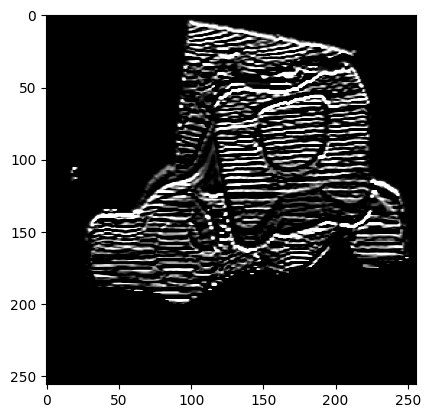

In [5]:
#code here
img1 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)
maskX = np.array([[-1, -2, -1],
                 [0, 0, 0],
                 [1, 2, 1]
                 ])
maskY = np.array([[-1, 0, 1],
                 [-2, 0, 2],
                 [-1, 0, 1]
                 ])
Gx = cv2.filter2D(img1, cv2.CV_64F, maskX)
Gy = cv2.filter2D(img1, cv2.CV_64F, maskY)

mag = np.sqrt(Gx**2 + Gy**2)
mag = np.uint8(mag)

plt.imshow(Gx, cmap='gray', vmin=0, vmax=255);


4) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

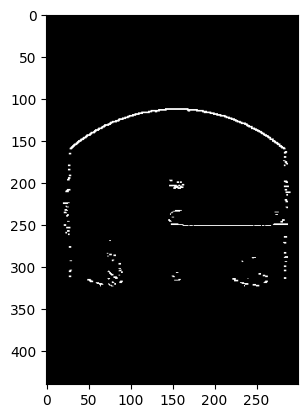

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
#code here
img1 = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)

maskX = np.array([[-1, -2, -1],
                 [0, 0, 0],
                 [1, 2, 1]
                 ])
maskY = np.array([[-1, 0, 1],
                 [-2, 0, 2],
                 [-1, 0, 1]
                 ])
Gx = cv2.filter2D(img1, cv2.CV_64F, maskX)
Gy = cv2.filter2D(img1, cv2.CV_64F, maskY)

mag = np.sqrt(Gx**2 + Gy**2)
mag = np.uint8(mag)

imgLimiarizada = np.where(Gx >= 150, 1, 0)
imgLimiarizada = 255 * (imgLimiarizada - imgLimiarizada.min())//(imgLimiarizada.max() - imgLimiarizada.min())
plt.imshow(imgLimiarizada, cmap='gray', vmin=0, vmax=255);

5) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

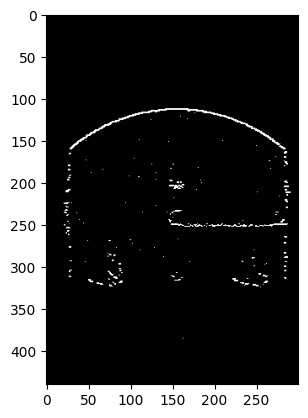

In [7]:

#code here
img1 = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)
maskX = np.array([[-1, -2, -1],
                 [0, 0, 0],
                 [1, 2, 1]
                 ])
maskY = np.array([[-1, 0, 1],
                 [-2, 0, 2],
                 [-1, 0, 1]
                 ])
Gx = cv2.filter2D(img1, cv2.CV_64F, maskX)
Gy = cv2.filter2D(img1, cv2.CV_64F, maskY)

mag = np.sqrt(Gx**2 + Gy**2)
mag = np.uint8(mag)

imgLimiarizada = np.where(Gx > 150, 1, 0)
imgLimiarizada = 255 * (imgLimiarizada - imgLimiarizada.min())//(imgLimiarizada.max() - imgLimiarizada.min())

plt.imshow(imgLimiarizada, cmap='gray', vmin=0, vmax=255);
